# BITAmin Review Project
* goal: Loan approval prediction model 
* data: https://www.kaggle.com/vipin20/loan-application-data

# Problems
* 결측값을 어떻게 처리할지
* 어떤 인코딩 방식을 이용할지
* 클래스 불균형 문제

# Load library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# Load data

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [3]:
# 불필요한 features 삭제
df = df.drop(['Unnamed: 0', 'Loan_ID'], axis=1)

In [4]:
# Total_Income 변환
for i in range(len(df['Total_Income'])):
    df['Total_Income'][i] = float(df['Total_Income'][i].strip('$'))
    
df['Total_Income'] = df['Total_Income'].astype(float)

In [5]:
# features/label 분리
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
Gender               491 non-null object
Married              497 non-null object
Dependents           488 non-null object
Education            500 non-null object
Self_Employed        473 non-null object
ApplicantIncome      500 non-null int64
CoapplicantIncome    500 non-null float64
LoanAmount           482 non-null float64
Loan_Amount_Term     486 non-null float64
Credit_History       459 non-null float64
Property_Area        500 non-null object
Loan_Status          500 non-null object
Total_Income         500 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 50.9+ KB


### (1) Response Variable 
* Loan_Status: 이번 분석의 반응변수로 대출 가능 상태를 나타냄
* Y는 대출 가능, N는 대출 불가능
* 클래스 불균형 문제 존재 

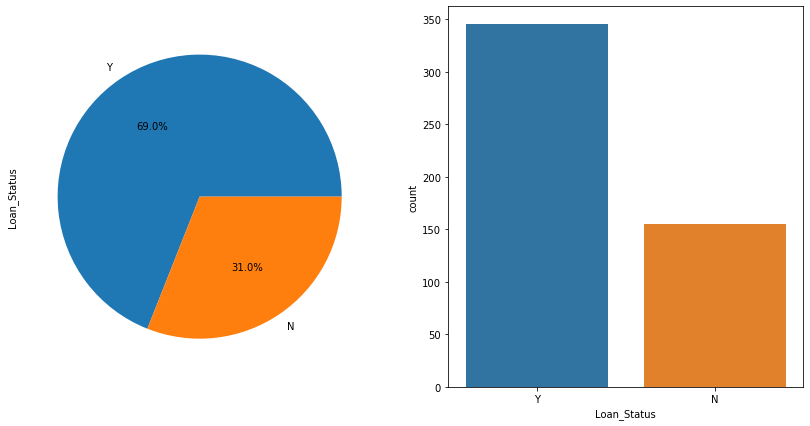

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
y.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
sns.countplot('Loan_Status', data=df, ax=ax[1])
plt.show()

### (2) Categorical Features
* 명목형
* 순서형

### Gender

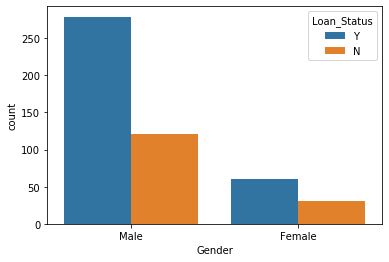

In [8]:
sns.countplot(df['Gender'], hue = df['Loan_Status'])
plt.show()

### Married

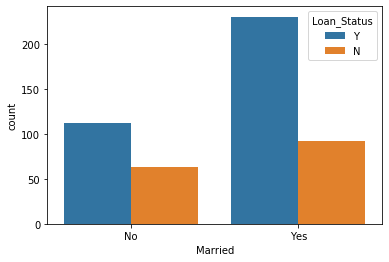

In [9]:
sns.countplot(df['Married'], hue = df['Loan_Status'])
plt.show()

### Dependents

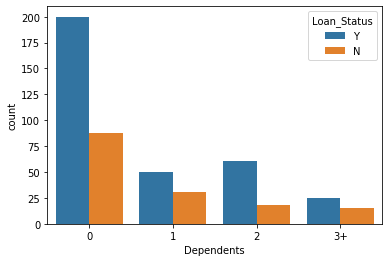

In [10]:
sns.countplot(df['Dependents'], hue = df['Loan_Status'])
plt.show()

In [11]:
df['Dependents'].value_counts()

0     288
1      81
2      79
3+     40
Name: Dependents, dtype: int64

### Education 

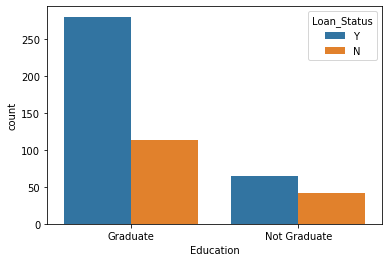

In [12]:
sns.countplot(df['Education'], hue = df['Loan_Status'])
plt.show()

### Self_Employed

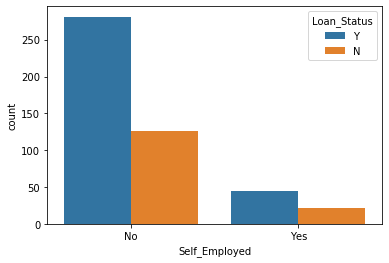

In [13]:
sns.countplot(df['Self_Employed'], hue = df['Loan_Status'])
plt.show()

### Property_Area
* 얘를 순서형으로 생각해줘야 될까?

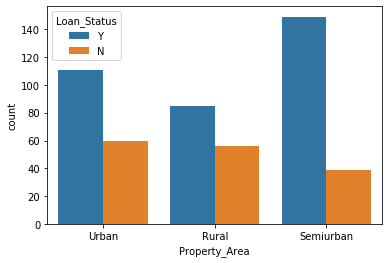

In [14]:
sns.countplot(df['Property_Area'], hue = df['Loan_Status'])
plt.show()

### (3) Numerical Features
* 이산형
* 연속형

### ApplicantIncome 

Skewness coeff. is: 6.490441
Kurtosis coeff. is: 56.879270


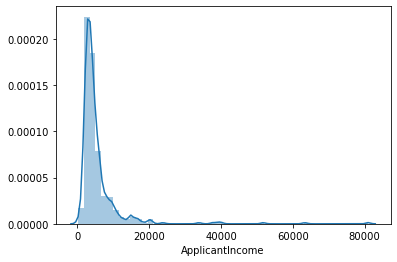

In [15]:
sns.distplot(df['ApplicantIncome'])
print("Skewness coeff. is: %f" % df['ApplicantIncome'].skew())
print("Kurtosis coeff. is: %f" % df['ApplicantIncome'].kurt())

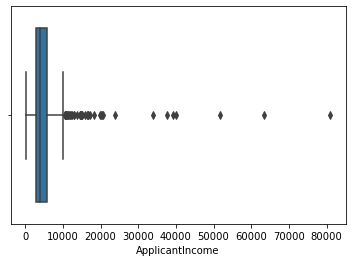

In [16]:
sns.boxplot(df['ApplicantIncome'])

### CoapplicantIncome

Skewness coeff. is: 3.579184
Kurtosis coeff. is: 23.456213


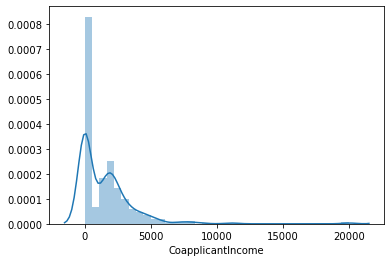

In [17]:
sns.distplot(df['CoapplicantIncome']);
print("Skewness coeff. is: %f" % df['CoapplicantIncome'].skew())
print("Kurtosis coeff. is: %f" % df['CoapplicantIncome'].kurt())

### LoanAmount

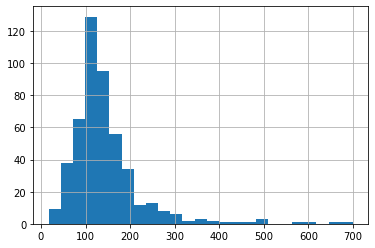

In [18]:
df['LoanAmount'].hist(bins=25)

### Loan_Amount_Term

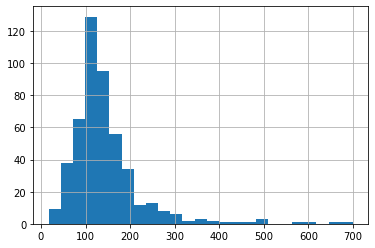

In [19]:
df['LoanAmount'].hist(bins=25)

### Credit_History
* float형 -> object형 변환 

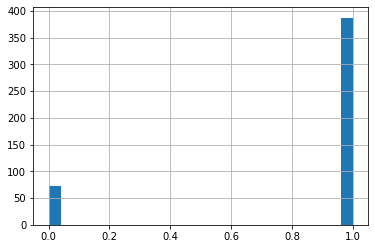

In [20]:
df['Credit_History'].hist(bins=25)

In [21]:
df['Credit_History'] = df['Credit_History'].astype('object')

### Total_Income

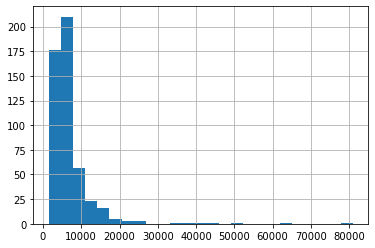

In [22]:
df['Total_Income'].hist(bins=25)

### (4) Correlation heatmap
* Total_Income과의 상관계수가 0.95로 가장 큰 연관성을 보임
* 아 근데 인코딩 끝나고 다시 봐야됨

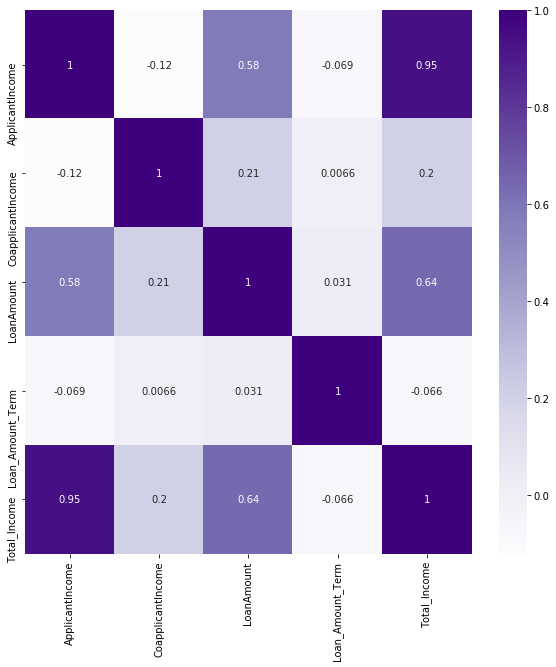

In [23]:
plt.figure(figsize=(10, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples)
plt.show()

# Data Preprocessing

In [24]:
# 중복열 확인 -> 0
duplicate=df[df.duplicated()]
len(duplicate)

0

In [25]:
# 결측값 확인 -> 고려 필요 
df.isnull().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [26]:
# 연속형 피처 리스트 저장
num_col = list(X._get_numeric_data().columns)

# 범주형 피처 리스트 저장
cat_col = list(X.columns)
for col in num_col:
    cat_col.remove(col)         

### 결측값 처리

In [27]:
# 연속형 데이터 결측값 처리: 평균값으로 채우기
for col in num_col:
    X[col].fillna(round(np.mean(X[col])), inplace=True)

# 범주형 데이터 결측값 처리: 최빈값으로 채우기
for col in cat_col:
    X[col].fillna(X[col].mode()[0], inplace=True)

### Encoding

In [28]:
# 범주형 데이터 인코딩: 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for cat in cat_col:
    X[cat] = encoder.fit_transform(X[cat])

### Scaling

In [29]:
# 연속형 데이터 스케일링: log1p
for num in num_col:
    X[num] = np.log1p(X[num]) 

### 불균형 데이터 처리
* 불균형 데이터 처리 후 accuracy 상승
* RandomOverSampling 대신 SMOTE나 다른 방법도 고려

Original dataset shape Counter({'Y': 345, 'N': 155})
Resampled dataset shape Counter({'Y': 345, 'N': 345})


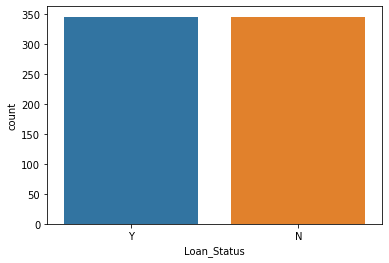

In [30]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

randomsample= RandomOverSampler()
X_new, y_new=randomsample.fit_sample(X, y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new)

# Modeling
* gridsearchCV, stratifiedKFold 등을 이용한 모델 개선 필요
* 여러 가지 방법으로 모델링 후 앙상블까지 하면 좋을 듯

In [31]:
# For 기본 모델
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [32]:
# For 불균형 데이터 처리 모델
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=0)

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: {:0.4f}'.format(accuracy_score(y_test, rf_preds)))

Accuracy Score: 0.8555


### LightGBM

In [47]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=500)
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: {:0.4f}'.format(accuracy_score(y_test, lgbm_preds)))

Accuracy Score: 0.8613


### KNN
* 너무 성능이 안좋아서 패스

In [37]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)
# knn_preds = knn.predict(X_test)

In [38]:
# from sklearn.metrics import accuracy_score
# print('Accuracy Score: {:0.4f}'.format(accuracy_score(y_test, knn_preds)))

### Logistic Regression
* 이것도 성능이 안좋음..

In [39]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# lr_preds = lr.predict(X_test)

In [40]:
# from sklearn.metrics import accuracy_score
# print('Accuracy Score: {:0.4f}'.format(accuracy_score(y_test, lr_preds)))

### CatBoost
* catboost 모델은 object형 변수를 자동으로 변환해주기 때문에 인코딩할 필요 없음!

In [41]:
cat_features = [f for f in X_new.columns if X_new[f].dtype == 'object']

from catboost import CatBoostClassifier
cat = CatBoostClassifier(n_estimators=3000)
cat.fit(X_train, y_train, cat_features=cat_features, early_stopping_rounds=50)
cat_preds = cat.predict(X_test)

Learning rate set to 0.002838
0:	learn: 0.6915755	total: 148ms	remaining: 7m 24s
1:	learn: 0.6899746	total: 151ms	remaining: 3m 46s
2:	learn: 0.6886709	total: 153ms	remaining: 2m 32s
3:	learn: 0.6872328	total: 156ms	remaining: 1m 56s
4:	learn: 0.6857320	total: 159ms	remaining: 1m 35s
5:	learn: 0.6840040	total: 162ms	remaining: 1m 20s
6:	learn: 0.6824352	total: 165ms	remaining: 1m 10s
7:	learn: 0.6809266	total: 169ms	remaining: 1m 3s
8:	learn: 0.6795407	total: 171ms	remaining: 56.9s
9:	learn: 0.6782191	total: 176ms	remaining: 52.5s
10:	learn: 0.6767991	total: 179ms	remaining: 48.6s
11:	learn: 0.6753055	total: 186ms	remaining: 46.3s
12:	learn: 0.6738742	total: 188ms	remaining: 43.3s
13:	learn: 0.6723922	total: 191ms	remaining: 40.8s
14:	learn: 0.6708475	total: 195ms	remaining: 38.8s
15:	learn: 0.6695976	total: 197ms	remaining: 36.7s
16:	learn: 0.6681887	total: 199ms	remaining: 34.9s
17:	learn: 0.6667082	total: 201ms	remaining: 33.3s
18:	learn: 0.6653002	total: 203ms	remaining: 31.9s
19:	

166:	learn: 0.5232589	total: 636ms	remaining: 10.8s
167:	learn: 0.5222827	total: 641ms	remaining: 10.8s
168:	learn: 0.5218385	total: 645ms	remaining: 10.8s
169:	learn: 0.5211225	total: 649ms	remaining: 10.8s
170:	learn: 0.5203012	total: 656ms	remaining: 10.8s
171:	learn: 0.5196189	total: 663ms	remaining: 10.9s
172:	learn: 0.5190511	total: 670ms	remaining: 10.9s
173:	learn: 0.5184221	total: 675ms	remaining: 11s
174:	learn: 0.5176261	total: 681ms	remaining: 11s
175:	learn: 0.5171019	total: 685ms	remaining: 11s
176:	learn: 0.5164321	total: 690ms	remaining: 11s
177:	learn: 0.5157651	total: 695ms	remaining: 11s
178:	learn: 0.5150674	total: 697ms	remaining: 11s
179:	learn: 0.5145147	total: 700ms	remaining: 11s
180:	learn: 0.5141088	total: 701ms	remaining: 10.9s
181:	learn: 0.5137028	total: 702ms	remaining: 10.9s
182:	learn: 0.5130748	total: 706ms	remaining: 10.9s
183:	learn: 0.5123569	total: 708ms	remaining: 10.8s
184:	learn: 0.5116564	total: 710ms	remaining: 10.8s
185:	learn: 0.5108391	tota

327:	learn: 0.4446372	total: 1.25s	remaining: 10.2s
328:	learn: 0.4443337	total: 1.26s	remaining: 10.2s
329:	learn: 0.4440587	total: 1.27s	remaining: 10.3s
330:	learn: 0.4435904	total: 1.28s	remaining: 10.3s
331:	learn: 0.4433759	total: 1.28s	remaining: 10.3s
332:	learn: 0.4429955	total: 1.29s	remaining: 10.3s
333:	learn: 0.4424045	total: 1.29s	remaining: 10.3s
334:	learn: 0.4422350	total: 1.29s	remaining: 10.3s
335:	learn: 0.4418891	total: 1.3s	remaining: 10.3s
336:	learn: 0.4414457	total: 1.3s	remaining: 10.3s
337:	learn: 0.4411055	total: 1.31s	remaining: 10.3s
338:	learn: 0.4405787	total: 1.31s	remaining: 10.3s
339:	learn: 0.4402718	total: 1.32s	remaining: 10.3s
340:	learn: 0.4400788	total: 1.32s	remaining: 10.3s
341:	learn: 0.4396921	total: 1.32s	remaining: 10.3s
342:	learn: 0.4392913	total: 1.33s	remaining: 10.3s
343:	learn: 0.4389785	total: 1.33s	remaining: 10.3s
344:	learn: 0.4387059	total: 1.34s	remaining: 10.3s
345:	learn: 0.4384735	total: 1.35s	remaining: 10.3s
346:	learn: 0.

489:	learn: 0.4006471	total: 1.89s	remaining: 9.66s
490:	learn: 0.4003287	total: 1.89s	remaining: 9.67s
491:	learn: 0.4001667	total: 1.9s	remaining: 9.68s
492:	learn: 0.3999304	total: 1.91s	remaining: 9.73s
493:	learn: 0.3997459	total: 1.92s	remaining: 9.75s
494:	learn: 0.3995561	total: 1.93s	remaining: 9.77s
495:	learn: 0.3993610	total: 1.94s	remaining: 9.78s
496:	learn: 0.3990468	total: 1.95s	remaining: 9.8s
497:	learn: 0.3989076	total: 1.95s	remaining: 9.79s
498:	learn: 0.3986480	total: 1.95s	remaining: 9.79s
499:	learn: 0.3984686	total: 1.96s	remaining: 9.82s
500:	learn: 0.3982908	total: 1.97s	remaining: 9.82s
501:	learn: 0.3981985	total: 1.98s	remaining: 9.84s
502:	learn: 0.3978414	total: 1.98s	remaining: 9.83s
503:	learn: 0.3976030	total: 1.99s	remaining: 9.84s
504:	learn: 0.3973961	total: 1.99s	remaining: 9.83s
505:	learn: 0.3971524	total: 1.99s	remaining: 9.82s
506:	learn: 0.3968944	total: 2s	remaining: 9.83s
507:	learn: 0.3966730	total: 2s	remaining: 9.83s
508:	learn: 0.396303

666:	learn: 0.3662280	total: 2.51s	remaining: 8.77s
667:	learn: 0.3660498	total: 2.51s	remaining: 8.77s
668:	learn: 0.3658212	total: 2.51s	remaining: 8.76s
669:	learn: 0.3656224	total: 2.52s	remaining: 8.75s
670:	learn: 0.3654416	total: 2.52s	remaining: 8.75s
671:	learn: 0.3651793	total: 2.52s	remaining: 8.75s
672:	learn: 0.3650604	total: 2.53s	remaining: 8.74s
673:	learn: 0.3647819	total: 2.53s	remaining: 8.73s
674:	learn: 0.3645553	total: 2.53s	remaining: 8.73s
675:	learn: 0.3642250	total: 2.54s	remaining: 8.72s
676:	learn: 0.3640229	total: 2.54s	remaining: 8.71s
677:	learn: 0.3637939	total: 2.54s	remaining: 8.7s
678:	learn: 0.3635614	total: 2.54s	remaining: 8.69s
679:	learn: 0.3631863	total: 2.54s	remaining: 8.68s
680:	learn: 0.3630443	total: 2.55s	remaining: 8.67s
681:	learn: 0.3629311	total: 2.55s	remaining: 8.66s
682:	learn: 0.3628612	total: 2.55s	remaining: 8.66s
683:	learn: 0.3627113	total: 2.55s	remaining: 8.65s
684:	learn: 0.3624293	total: 2.56s	remaining: 8.64s
685:	learn: 0

881:	learn: 0.3306111	total: 3.12s	remaining: 7.5s
882:	learn: 0.3304911	total: 3.12s	remaining: 7.49s
883:	learn: 0.3303224	total: 3.13s	remaining: 7.49s
884:	learn: 0.3302243	total: 3.13s	remaining: 7.48s
885:	learn: 0.3301192	total: 3.13s	remaining: 7.48s
886:	learn: 0.3299942	total: 3.14s	remaining: 7.47s
887:	learn: 0.3298287	total: 3.14s	remaining: 7.47s
888:	learn: 0.3296240	total: 3.14s	remaining: 7.46s
889:	learn: 0.3295613	total: 3.15s	remaining: 7.46s
890:	learn: 0.3294609	total: 3.15s	remaining: 7.45s
891:	learn: 0.3292566	total: 3.15s	remaining: 7.45s
892:	learn: 0.3291029	total: 3.15s	remaining: 7.44s
893:	learn: 0.3289413	total: 3.16s	remaining: 7.43s
894:	learn: 0.3288083	total: 3.16s	remaining: 7.43s
895:	learn: 0.3286163	total: 3.16s	remaining: 7.42s
896:	learn: 0.3284695	total: 3.16s	remaining: 7.42s
897:	learn: 0.3283033	total: 3.17s	remaining: 7.41s
898:	learn: 0.3281666	total: 3.17s	remaining: 7.41s
899:	learn: 0.3280189	total: 3.17s	remaining: 7.4s
900:	learn: 0.

1086:	learn: 0.3051104	total: 3.74s	remaining: 6.59s
1087:	learn: 0.3049864	total: 3.75s	remaining: 6.58s
1088:	learn: 0.3048725	total: 3.75s	remaining: 6.58s
1089:	learn: 0.3046726	total: 3.75s	remaining: 6.58s
1090:	learn: 0.3045398	total: 3.75s	remaining: 6.57s
1091:	learn: 0.3044488	total: 3.76s	remaining: 6.57s
1092:	learn: 0.3042113	total: 3.76s	remaining: 6.56s
1093:	learn: 0.3040632	total: 3.77s	remaining: 6.56s
1094:	learn: 0.3039639	total: 3.77s	remaining: 6.56s
1095:	learn: 0.3038504	total: 3.77s	remaining: 6.55s
1096:	learn: 0.3037785	total: 3.77s	remaining: 6.55s
1097:	learn: 0.3037181	total: 3.77s	remaining: 6.54s
1098:	learn: 0.3035970	total: 3.78s	remaining: 6.54s
1099:	learn: 0.3035256	total: 3.78s	remaining: 6.53s
1100:	learn: 0.3034026	total: 3.78s	remaining: 6.53s
1101:	learn: 0.3033266	total: 3.79s	remaining: 6.52s
1102:	learn: 0.3032119	total: 3.79s	remaining: 6.51s
1103:	learn: 0.3031106	total: 3.79s	remaining: 6.51s
1104:	learn: 0.3030478	total: 3.79s	remaining:

1262:	learn: 0.2853764	total: 4.21s	remaining: 5.79s
1263:	learn: 0.2853028	total: 4.21s	remaining: 5.78s
1264:	learn: 0.2851585	total: 4.21s	remaining: 5.78s
1265:	learn: 0.2850652	total: 4.22s	remaining: 5.78s
1266:	learn: 0.2850239	total: 4.22s	remaining: 5.78s
1267:	learn: 0.2849328	total: 4.22s	remaining: 5.77s
1268:	learn: 0.2848447	total: 4.23s	remaining: 5.77s
1269:	learn: 0.2847600	total: 4.23s	remaining: 5.76s
1270:	learn: 0.2846928	total: 4.23s	remaining: 5.76s
1271:	learn: 0.2845841	total: 4.24s	remaining: 5.75s
1272:	learn: 0.2845272	total: 4.24s	remaining: 5.75s
1273:	learn: 0.2844564	total: 4.24s	remaining: 5.75s
1274:	learn: 0.2843854	total: 4.24s	remaining: 5.74s
1275:	learn: 0.2843002	total: 4.25s	remaining: 5.74s
1276:	learn: 0.2842056	total: 4.25s	remaining: 5.73s
1277:	learn: 0.2841157	total: 4.25s	remaining: 5.73s
1278:	learn: 0.2840205	total: 4.25s	remaining: 5.72s
1279:	learn: 0.2839424	total: 4.25s	remaining: 5.72s
1280:	learn: 0.2838780	total: 4.26s	remaining:

1434:	learn: 0.2682253	total: 4.67s	remaining: 5.1s
1435:	learn: 0.2681251	total: 4.68s	remaining: 5.09s
1436:	learn: 0.2680071	total: 4.68s	remaining: 5.09s
1437:	learn: 0.2679240	total: 4.68s	remaining: 5.09s
1438:	learn: 0.2678408	total: 4.68s	remaining: 5.08s
1439:	learn: 0.2677934	total: 4.69s	remaining: 5.08s
1440:	learn: 0.2676729	total: 4.69s	remaining: 5.08s
1441:	learn: 0.2676009	total: 4.69s	remaining: 5.07s
1442:	learn: 0.2675164	total: 4.7s	remaining: 5.07s
1443:	learn: 0.2673406	total: 4.7s	remaining: 5.06s
1444:	learn: 0.2672352	total: 4.7s	remaining: 5.06s
1445:	learn: 0.2671423	total: 4.7s	remaining: 5.05s
1446:	learn: 0.2670729	total: 4.71s	remaining: 5.05s
1447:	learn: 0.2670034	total: 4.71s	remaining: 5.05s
1448:	learn: 0.2669248	total: 4.71s	remaining: 5.04s
1449:	learn: 0.2668859	total: 4.71s	remaining: 5.04s
1450:	learn: 0.2667917	total: 4.71s	remaining: 5.03s
1451:	learn: 0.2666142	total: 4.72s	remaining: 5.03s
1452:	learn: 0.2665255	total: 4.72s	remaining: 5.03

1605:	learn: 0.2528066	total: 5.13s	remaining: 4.45s
1606:	learn: 0.2527130	total: 5.13s	remaining: 4.45s
1607:	learn: 0.2526861	total: 5.13s	remaining: 4.44s
1608:	learn: 0.2525924	total: 5.14s	remaining: 4.44s
1609:	learn: 0.2525343	total: 5.14s	remaining: 4.44s
1610:	learn: 0.2524945	total: 5.14s	remaining: 4.43s
1611:	learn: 0.2524213	total: 5.15s	remaining: 4.43s
1612:	learn: 0.2523161	total: 5.15s	remaining: 4.43s
1613:	learn: 0.2522443	total: 5.15s	remaining: 4.43s
1614:	learn: 0.2521495	total: 5.16s	remaining: 4.42s
1615:	learn: 0.2521485	total: 5.16s	remaining: 4.42s
1616:	learn: 0.2520542	total: 5.16s	remaining: 4.41s
1617:	learn: 0.2519721	total: 5.16s	remaining: 4.41s
1618:	learn: 0.2518905	total: 5.17s	remaining: 4.41s
1619:	learn: 0.2518092	total: 5.17s	remaining: 4.4s
1620:	learn: 0.2517390	total: 5.17s	remaining: 4.4s
1621:	learn: 0.2516259	total: 5.17s	remaining: 4.39s
1622:	learn: 0.2515403	total: 5.18s	remaining: 4.39s
1623:	learn: 0.2514710	total: 5.18s	remaining: 4

1770:	learn: 0.2393015	total: 5.59s	remaining: 3.88s
1771:	learn: 0.2392652	total: 5.6s	remaining: 3.88s
1772:	learn: 0.2391718	total: 5.6s	remaining: 3.88s
1773:	learn: 0.2390896	total: 5.6s	remaining: 3.87s
1774:	learn: 0.2389983	total: 5.61s	remaining: 3.87s
1775:	learn: 0.2389497	total: 5.61s	remaining: 3.87s
1776:	learn: 0.2388534	total: 5.61s	remaining: 3.86s
1777:	learn: 0.2388005	total: 5.62s	remaining: 3.86s
1778:	learn: 0.2387452	total: 5.62s	remaining: 3.86s
1779:	learn: 0.2386750	total: 5.62s	remaining: 3.85s
1780:	learn: 0.2386062	total: 5.63s	remaining: 3.85s
1781:	learn: 0.2385322	total: 5.63s	remaining: 3.85s
1782:	learn: 0.2384412	total: 5.63s	remaining: 3.84s
1783:	learn: 0.2383476	total: 5.63s	remaining: 3.84s
1784:	learn: 0.2382504	total: 5.64s	remaining: 3.84s
1785:	learn: 0.2381436	total: 5.64s	remaining: 3.83s
1786:	learn: 0.2379892	total: 5.64s	remaining: 3.83s
1787:	learn: 0.2379138	total: 5.65s	remaining: 3.83s
1788:	learn: 0.2378220	total: 5.65s	remaining: 3.

1956:	learn: 0.2241057	total: 6.05s	remaining: 3.23s
1957:	learn: 0.2240862	total: 6.06s	remaining: 3.22s
1958:	learn: 0.2239829	total: 6.06s	remaining: 3.22s
1959:	learn: 0.2238724	total: 6.06s	remaining: 3.22s
1960:	learn: 0.2238063	total: 6.07s	remaining: 3.21s
1961:	learn: 0.2236842	total: 6.07s	remaining: 3.21s
1962:	learn: 0.2236111	total: 6.08s	remaining: 3.21s
1963:	learn: 0.2234935	total: 6.08s	remaining: 3.21s
1964:	learn: 0.2234693	total: 6.08s	remaining: 3.2s
1965:	learn: 0.2233790	total: 6.08s	remaining: 3.2s
1966:	learn: 0.2233344	total: 6.08s	remaining: 3.19s
1967:	learn: 0.2232627	total: 6.09s	remaining: 3.19s
1968:	learn: 0.2231695	total: 6.09s	remaining: 3.19s
1969:	learn: 0.2231044	total: 6.09s	remaining: 3.19s
1970:	learn: 0.2230565	total: 6.09s	remaining: 3.18s
1971:	learn: 0.2229905	total: 6.1s	remaining: 3.18s
1972:	learn: 0.2229166	total: 6.1s	remaining: 3.17s
1973:	learn: 0.2228719	total: 6.1s	remaining: 3.17s
1974:	learn: 0.2228118	total: 6.1s	remaining: 3.17s

2146:	learn: 0.2099092	total: 6.68s	remaining: 2.66s
2147:	learn: 0.2098321	total: 6.7s	remaining: 2.65s
2148:	learn: 0.2097419	total: 6.7s	remaining: 2.65s
2149:	learn: 0.2096565	total: 6.71s	remaining: 2.65s
2150:	learn: 0.2096191	total: 6.71s	remaining: 2.65s
2151:	learn: 0.2095448	total: 6.72s	remaining: 2.65s
2152:	learn: 0.2095205	total: 6.72s	remaining: 2.65s
2153:	learn: 0.2094669	total: 6.73s	remaining: 2.64s
2154:	learn: 0.2094575	total: 6.73s	remaining: 2.64s
2155:	learn: 0.2094221	total: 6.74s	remaining: 2.64s
2156:	learn: 0.2093031	total: 6.74s	remaining: 2.63s
2157:	learn: 0.2091970	total: 6.74s	remaining: 2.63s
2158:	learn: 0.2091615	total: 6.75s	remaining: 2.63s
2159:	learn: 0.2090826	total: 6.75s	remaining: 2.63s
2160:	learn: 0.2090218	total: 6.76s	remaining: 2.62s
2161:	learn: 0.2089603	total: 6.76s	remaining: 2.62s
2162:	learn: 0.2089472	total: 6.76s	remaining: 2.62s
2163:	learn: 0.2088720	total: 6.77s	remaining: 2.61s
2164:	learn: 0.2088451	total: 6.77s	remaining: 2

2350:	learn: 0.1952428	total: 7.47s	remaining: 2.06s
2351:	learn: 0.1951701	total: 7.47s	remaining: 2.06s
2352:	learn: 0.1951383	total: 7.47s	remaining: 2.05s
2353:	learn: 0.1951011	total: 7.47s	remaining: 2.05s
2354:	learn: 0.1950160	total: 7.48s	remaining: 2.05s
2355:	learn: 0.1949028	total: 7.48s	remaining: 2.04s
2356:	learn: 0.1948546	total: 7.49s	remaining: 2.04s
2357:	learn: 0.1947960	total: 7.49s	remaining: 2.04s
2358:	learn: 0.1946807	total: 7.49s	remaining: 2.04s
2359:	learn: 0.1946466	total: 7.49s	remaining: 2.03s
2360:	learn: 0.1946129	total: 7.5s	remaining: 2.03s
2361:	learn: 0.1945331	total: 7.5s	remaining: 2.02s
2362:	learn: 0.1944897	total: 7.5s	remaining: 2.02s
2363:	learn: 0.1944140	total: 7.5s	remaining: 2.02s
2364:	learn: 0.1943416	total: 7.5s	remaining: 2.02s
2365:	learn: 0.1942886	total: 7.51s	remaining: 2.01s
2366:	learn: 0.1942117	total: 7.51s	remaining: 2.01s
2367:	learn: 0.1941270	total: 7.51s	remaining: 2s
2368:	learn: 0.1940610	total: 7.51s	remaining: 2s
2369

2559:	learn: 0.1823514	total: 8.09s	remaining: 1.39s
2560:	learn: 0.1823134	total: 8.09s	remaining: 1.39s
2561:	learn: 0.1822794	total: 8.09s	remaining: 1.38s
2562:	learn: 0.1822368	total: 8.1s	remaining: 1.38s
2563:	learn: 0.1821813	total: 8.1s	remaining: 1.38s
2564:	learn: 0.1821299	total: 8.1s	remaining: 1.37s
2565:	learn: 0.1820685	total: 8.11s	remaining: 1.37s
2566:	learn: 0.1820186	total: 8.11s	remaining: 1.37s
2567:	learn: 0.1819437	total: 8.11s	remaining: 1.36s
2568:	learn: 0.1818777	total: 8.11s	remaining: 1.36s
2569:	learn: 0.1818361	total: 8.12s	remaining: 1.36s
2570:	learn: 0.1817877	total: 8.12s	remaining: 1.35s
2571:	learn: 0.1817445	total: 8.12s	remaining: 1.35s
2572:	learn: 0.1817171	total: 8.12s	remaining: 1.35s
2573:	learn: 0.1816412	total: 8.13s	remaining: 1.34s
2574:	learn: 0.1816159	total: 8.13s	remaining: 1.34s
2575:	learn: 0.1815799	total: 8.13s	remaining: 1.34s
2576:	learn: 0.1815180	total: 8.13s	remaining: 1.33s
2577:	learn: 0.1814035	total: 8.13s	remaining: 1.

2725:	learn: 0.1730812	total: 8.72s	remaining: 877ms
2726:	learn: 0.1730217	total: 8.73s	remaining: 874ms
2727:	learn: 0.1729980	total: 8.73s	remaining: 870ms
2728:	learn: 0.1729352	total: 8.73s	remaining: 867ms
2729:	learn: 0.1728625	total: 8.74s	remaining: 864ms
2730:	learn: 0.1727939	total: 8.74s	remaining: 861ms
2731:	learn: 0.1727189	total: 8.75s	remaining: 858ms
2732:	learn: 0.1726207	total: 8.75s	remaining: 855ms
2733:	learn: 0.1725478	total: 8.75s	remaining: 852ms
2734:	learn: 0.1724986	total: 8.76s	remaining: 848ms
2735:	learn: 0.1724323	total: 8.76s	remaining: 845ms
2736:	learn: 0.1723711	total: 8.76s	remaining: 842ms
2737:	learn: 0.1723478	total: 8.77s	remaining: 839ms
2738:	learn: 0.1723236	total: 8.77s	remaining: 836ms
2739:	learn: 0.1722866	total: 8.77s	remaining: 832ms
2740:	learn: 0.1722448	total: 8.78s	remaining: 829ms
2741:	learn: 0.1721733	total: 8.78s	remaining: 826ms
2742:	learn: 0.1721421	total: 8.78s	remaining: 823ms
2743:	learn: 0.1720998	total: 8.78s	remaining:

2912:	learn: 0.1631683	total: 9.35s	remaining: 279ms
2913:	learn: 0.1630806	total: 9.35s	remaining: 276ms
2914:	learn: 0.1630026	total: 9.36s	remaining: 273ms
2915:	learn: 0.1629707	total: 9.36s	remaining: 270ms
2916:	learn: 0.1629166	total: 9.36s	remaining: 266ms
2917:	learn: 0.1628862	total: 9.37s	remaining: 263ms
2918:	learn: 0.1628286	total: 9.37s	remaining: 260ms
2919:	learn: 0.1627685	total: 9.37s	remaining: 257ms
2920:	learn: 0.1627200	total: 9.38s	remaining: 254ms
2921:	learn: 0.1626568	total: 9.38s	remaining: 250ms
2922:	learn: 0.1626308	total: 9.38s	remaining: 247ms
2923:	learn: 0.1625462	total: 9.39s	remaining: 244ms
2924:	learn: 0.1625175	total: 9.39s	remaining: 241ms
2925:	learn: 0.1624653	total: 9.39s	remaining: 238ms
2926:	learn: 0.1623735	total: 9.39s	remaining: 234ms
2927:	learn: 0.1623519	total: 9.4s	remaining: 231ms
2928:	learn: 0.1623348	total: 9.4s	remaining: 228ms
2929:	learn: 0.1622829	total: 9.4s	remaining: 225ms
2930:	learn: 0.1622611	total: 9.41s	remaining: 22

In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: {:0.4f}'.format(accuracy_score(y_test, cat_preds)))

Accuracy Score: 0.8382


### Stacking Ensemble